#  Homework 5
## MBIO612
### Gabrielle Martineau


-- Column specification --------------------------------------------------------
cols(
  transect_id = col_double(),
  coverage = col_double()
)



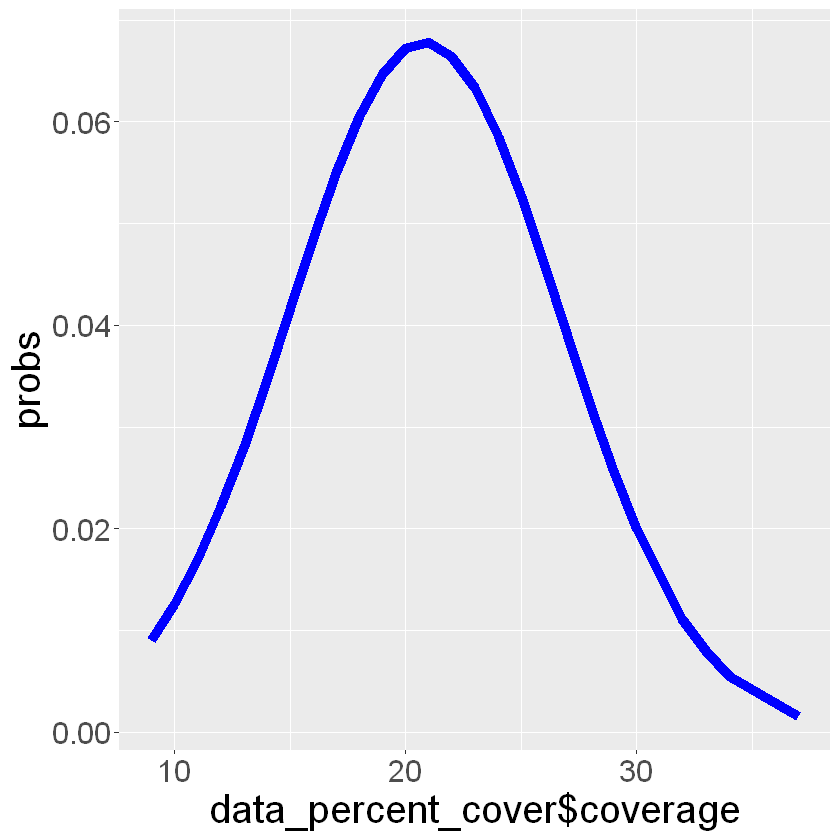

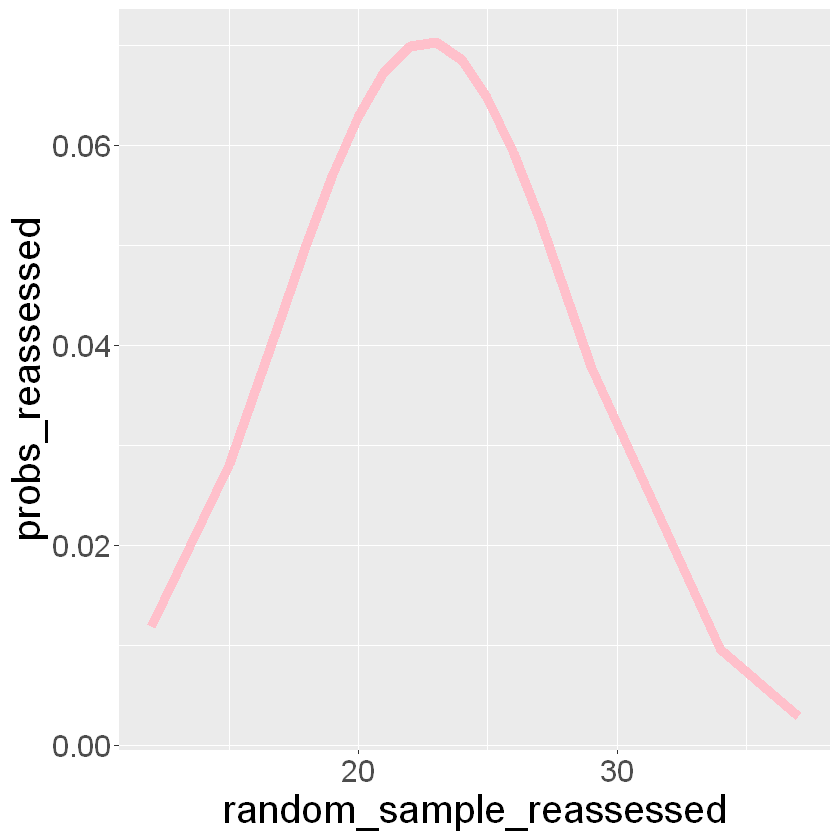


	Welch Two Sample t-test

data:  data_percent_cover$coverage and random_sample_reassessed
t = -1.4639, df = 37.988, p-value = 0.1514
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.4559728  0.7159728
sample estimates:
mean of x mean of y 
    20.81     22.68 


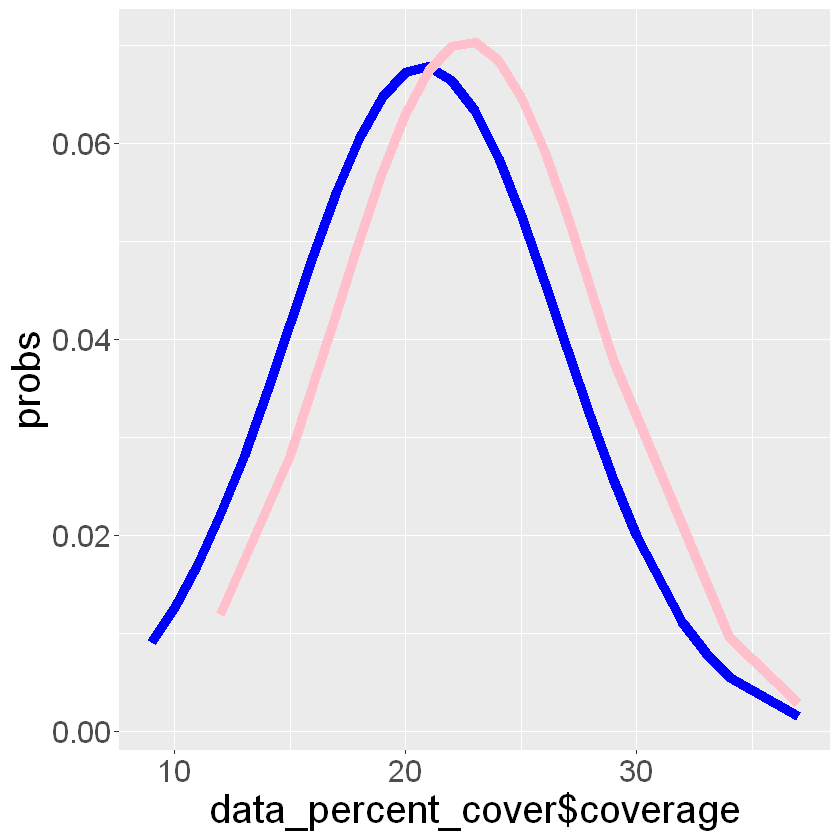

In [5]:
#Set working directory
setwd("~/U_of_H/FALL_2021/MBIO612/Week_6")

#download necessary libraries
library(tidyverse)

#load data
data_percent_cover = read_csv("survey_2018.csv")

#find the parameters of the distribution (mean and variance)
mean_data_percent_cover <- mean(data_percent_cover$coverage)
sd_data_percent_cover <- sd(data_percent_cover$coverage)

#Plot the data from 2018
#compute probability densite function according following a normal distribution of
# assumed under H0
probs =mapply(dnorm, data_percent_cover$coverage, mean = mean_data_percent_cover, sd = sd_data_percent_cover)

#Plot the gaussian curve for data from 2018
ggplot() + 
  geom_line(aes(x=data_percent_cover$coverage, y=probs), size=3, color= "blue") +
  theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18))

#Create the distribution of re-sampling 25 quadrats
set.seed(32)
random_sample_reassessed = sample(data_percent_cover$coverage, 25)

#find the parameters of the distribution (mean and variance)
mean_sample_reassessed <- mean(random_sample_reassessed)
sd_sample_reassessed <- sd(random_sample_reassessed)


#compute probability densite function according following a normal distribution of
# assumed under H0
probs_reassessed =mapply(dnorm, random_sample_reassessed, mean = mean_sample_reassessed, sd = sd_sample_reassessed)

#Plot the new gaussian curve
ggplot() + 
  geom_line(aes(x=random_sample_reassessed, y=probs_reassessed), size=3, color="pink") +
  theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18))

#plot both gaussian curves together
ggplot() + 
  geom_line(aes(x=data_percent_cover$coverage, y=probs), size=3, color="blue") +
  geom_line(aes(x=random_sample_reassessed, y=probs_reassessed), size=3, color= "pink") +
  theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18))

#Test whether or not the distributions are different
#Compute t-test
t.test(data_percent_cover$coverage,random_sample_reassessed)

After comparing the two distributions, we obtain a p-value of 0.l514 (df= 37.988), which is superior than the alpha treshold of 0.05. In this case, our null hypothesis was that our there is no significant difference between the mean of our two distributions. We hypothesiezed (alternative hypothesis) that the environmental stressor that occurred caused a deciline in species X's coverage, which would translate into two different means for both distributions. Our p-value indicates that we can't reject the null hypothesis to conclude that the two distributions are significantly different (and that they have different means and variances). Those results can be vizualised by the plot, where the blue curve represents the 2018 sampling or 100 quadrats, while the pink curve represent the re-asssesment of 25 quadrats. We can see that there is a big overlap between the two curves. Therefore, we can't say that the environemental stressors had a significant effect on the coral percent cover of species X. 